# Modeling the Temperature Control Laboratory: Part 1

<img src="./images/arduino_comsol.png"  style = "float:right;padding-left:30px;">
Mathematical modeling is an integral part of process control. The models come in many forms, ranging from the barest of information about a process to sophisticated simulation involving millions of computational nodes.  

Our purpose here is to demonstrate certain basic approaches that will provide with insight about the qualitative nature of process dynamics, how to construct simple models from first-principles understanding of the processes, and how to develop models in those circumstances when its not possible to start from first principles.

Our first example will be the Temperature Control Laboratory.


* First-order lumped model for a single heater/sensor device.
* Interacting first-order models for the dual heater/sensor.
* Second-order model for a single heater/sensor device.
* Interacting second-order model for the dual heater/sensor.

## First-order lumped model for heater/sensor device.

We'll be begin by writing a model for one of the heater/sensor pairs. We will assume the whole heater/sensor pair is at single uniform temperature $T_1$. Then we write a dynamic energy balance

\begin{align}
C_p\frac{dT_1}{dt} & = U_a(T_{amb} - T_1) + P_1u_1 \\
\end{align}

where $T_1$ is the combined temperature of heater/sensor one, $T_{amb}$ is the ambient temperature of the surroundings, and $u_1$ is a fraction of the maximum heater power $P_1$ being applied. The key parameters are the total heat capacity $C_p$ and the overall heat transfer coefficient with surroundings $U_a$.



### Steady State

We'll begin our analysis by investigating the steady-state response of this system to a steady-state input $\bar{u}_{1}$.  At steady-state all variables are constant so $\frac{dT_1}{dt} = 0$, which leaves 

\begin{align}
0 = U_a(T_{amb} - \bar{T}_1) + P_1\bar{u}_{1}
\end{align}

Solving for $\bar{T}_{1}$

$$\bar{T}_{1} = T_{amb} + \frac{P_1}{U_a}\bar{u}_{1}$$

**Exercise:** Examine the step response of the temperature control laboratory. Estimate the value for $T_{amb}$ and $\frac{P_1}{U_a}$. Given that this data was gathered with a value $u_1 = 0.5$ and $P_1 = 4$ watts, estimate the value for $U_a$ and give the appropriate units.

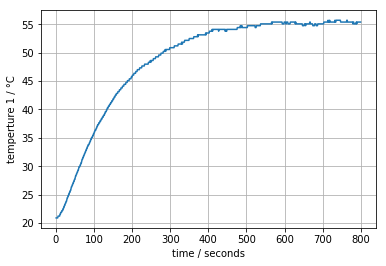

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
t = data.index
T1 = data['T1'].values
plt.plot(t,T1)
plt.xlabel('time / seconds')
plt.ylabel('temperture 1 / °C')
plt.grid()

### Deviation Variables

In examining the response of the temperature control laboratory, we see the temperature is a deviation from ambient temperature, i.e.,

\begin{align}
T_1' = T_1 - T_{amb}
\end{align}

For process control purposes, we are often interested in the deviation of a process variable from a nominal value. In this case the choice of deviation variable is clearly obvious which is designated $T_1'$. From the steady state equation we see

\begin{align}
\bar{T}_1' = \bar{T}_1 - T_{amb} = \frac{P_1}{U_a}\bar{u}_1
\end{align}

which is a somewhat simpler expression.

Let's see what happens to the transient model. Substituting $T_1 = T_{amb} + T_1'$ into the differential equation gives

\begin{align}
C_p\frac{d(T_{amb}+T_1')}{dt} & = U_a(T_{amb} - (T_{amb} + T_1')) + P_1u_1
\end{align}

Expanding these terms

\begin{align}
C_p\underbrace{\frac{dT_{amb}}{dt}}_{0} + C_p\frac{dT_1'}{dt} & = U_a(\underbrace{T_{amb} - T_{amb}}_{0} - T_1') + P_1u_1
\end{align}

we see several terms drop out. The derivative of any constant is zero, and see a cancelation on the right hand side, leaving

\begin{align}
C_p\frac{dT_1'}{dt} & = - U_aT_1' + P_1u_1
\end{align}

One last manipulation will bring this model into a commonly used standard form

\begin{align}
\frac{dT_1'}{dt} & = - \frac{U_a}{C_p}T_1' + \frac{P_1}{C_p}u_1
\end{align}

Now let's recall some facts about first order differential equations.

### First Order Linear Differential Equations

A standard form for a single differential equation is

\begin{align}
\frac{dx}{dt} & = ax + bu
\end{align}

where $a$ and $b$ are model constants, $x$ is the dependent variable, and $u$ is an exogeneous input.  

#### Steady State Response

For a constant value $\bar{u}$, the steady state response $\bar{x}$ is given by solution to the equation

\begin{align}
0 & = a\bar{x} + b\bar{u}
\end{align}

which is

\begin{align}
\bar{x} & = -\frac{b}{a} \bar{u}
\end{align}

#### Transient Response

The transient response is given by

\begin{align}
x(t) & = \bar{x} + \left[x(t_0) - \bar{x}\right] e^{a(t-t_0)}
\end{align}

which is an exact, analytical solution.

#### Apply to Model Equation

We now apply this textbook solution to the model equation. Comparing equations, we make the following identifications

\begin{align}
T_1' \sim x \\
-\frac{U_a}{C_p} \sim a \\
\frac{P_1}{C_p} \sim b \\
u_1 \sim u
\end{align}

Substituting these terms into the standard solution we confirm the steady-state solution found above, and provides a solution for the transient response of the deviation variables.

\begin{align}
\bar{x} = -\frac{b}{a}\bar{u} \qquad & \Rightarrow \qquad \bar{T}_{1}' = \frac{P_1}{U_a}\bar{u}_{1} \\
x(t) = \bar{x} + \left[x(t_0) - \bar{x}\right] e^{a(t-t_0)} \qquad & \Rightarrow \qquad
T_1'(t) = \frac{P_1}{U_a}\bar{u}_{1} + \left[T_1'(t_0) - \frac{P_1}{U_a}\bar{u}_{1}\right]e^{-\frac{U_a}{C_p}(t-t_0)}
\end{align}

### Plotting the Analytical Solution

The following cell demonstrates use of these results to plot the transient response for a particular choice of model parameters.

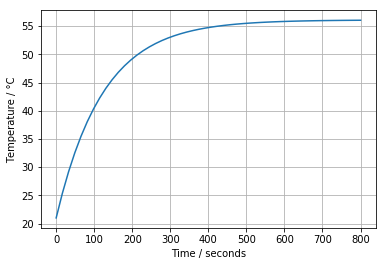

In [6]:
%matplotlib inline
import numpy as np                  # basic package for numerical calculations
import matplotlib.pyplot as plt     # plotting package

# parameter values and units
P1 = 4                 # watts
Ua = 0.057             # watts/deg C
Cp = 7                 # joules/deg C
u1_steadystate = 0.5   # steady state value of u1 (fraction of total power)
T_ambient = 21         # ambient temperature

# initial conditions
T1_deviation_initial = 0

# steady state solution
T1_deviation_steadystate = P1*u1_steadystate/Ua

# compute the transient solution
t = np.linspace(0,800)
T1_deviation = T1_deviation_steadystate \
     + (T1_deviation_initial - T1_deviation_steadystate)*np.exp(-Ua*t/Cp)

# plot
plt.plot(t, T1_deviation + T_ambient)
plt.xlabel('Time / seconds')
plt.ylabel('Temperature / °C')
plt.grid()

### Does this solution make sense?

The parameter values in the above plot were chosen to (at least roughly) reproduce the measured response of temperature control laboratory. The value used for the heat capacity was $C_p = 7$ watts/degC. Is this reasonable?

The [specific heat capacity for solids](https://en.wikipedia.org/wiki/Heat_capacity) is typically has values in the range of 0.2 to 0.9 watts/degC/gram. Using a value of 0.9 that is typical of aluminum and plastics used for electronic products, the estimated mass of the heater/sensor pair would be

$$ m \approx \frac{7 \mbox{ watts/degC}}{0.9 \mbox{ watts/degC/grams}} \approx 8 \mbox{ grams}$$

Does that make sense?  Why or why not?

### Improving the Solution

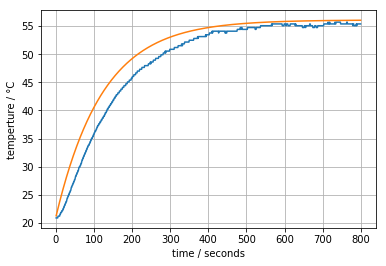

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
t = data.index
T1 = data['T1'].values

# known parameter values
P1 = 4
u1_steadystate = 0.5   # steady state value of u1 (fraction of total power)

def compare(Ua, Cp, T_ambient):
    T1_deviation_initial = 0
    T1_deviation_steadystate = P1*u1_steadystate/Ua
    T1_deviation = T1_deviation_steadystate \
         + (T1_deviation_initial - T1_deviation_steadystate)*np.exp(-Ua*t/Cp)
    T1_model = T1_deviation + T_ambient
    plt.plot(t, T1, t, T1_model)
    plt.xlabel('time / seconds')
    plt.ylabel('temperture / °C')
    plt.grid()

# estimated parameter values
Ua = 0.057             # watts/deg C
Cp = 7                 # joules/deg C
T_ambient = 21         # ambient temperature

compare(Ua, Cp, T_ambient)

In [8]:
from ipywidgets import interact
interact(compare, Ua=(0,0.1,.0005), Cp=(3,11,.1), T_ambient=(20,25,.1))

A Jupyter Widget

<function __main__.compare>